## <center>Introduction to Simple Linear Regression</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/Linear regression/Data Sets/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Is there a relationship between *total* advertising spend and *sales*?

In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

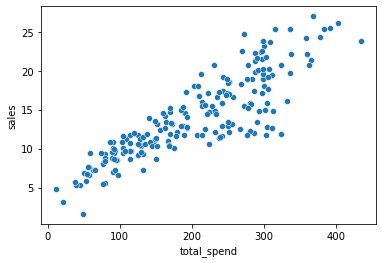

In [5]:
sns.scatterplot(x='total_spend',y='sales',data=df)

### Least Squares Line

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

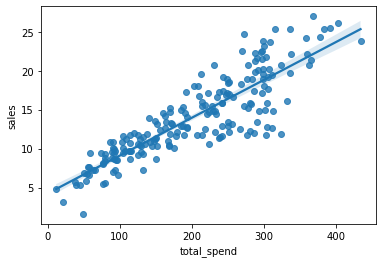

In [6]:
# Basically, we want to figure out how to create this line

sns.regplot(x='total_spend',y='sales',data=df)

Let's go ahead and start solving: $$y=mx+b$$

Simply solve for m and b, remember, that as shown in the video, we are solving in a generalized form:

$$ \hat{y} = \beta_0 + \beta_1X$$

Capitalized to signal that we are dealing with a matrix of values, we have a known matrix of labels (sales numbers) Y and a known matrix of total_spend (X). We are going to solve for the *beta* coefficients, which as we expand to more than just a single feature, will be important to build an understanding of what features have the most predictive power. We use $ \hat{y}$ to indicate that $\hat{y}$ is a prediction or estimation, y would be a true label/known value.


In [7]:
X = df['total_spend']
y = df['sales']

### Solving it by hand

Starting from the general formula:
$$ \hat{y} = \beta_0 + \beta_1X$$

The least squares line has two components: the slope $\beta_1$, and y-intercept $\beta_0$. We will solve for $\beta_1$ first, and then solve for $\beta_0$. The equations for $\beta_1$ and $\beta_0$ are:

$$\beta_1 = \frac{n*(\sum{Xy}) - (\sum{X})(\sum{y})}{n(\sum{X}^2)-(\sum{X})^2} = \frac{\sum{(X_i-\bar{X})(y_i - \bar{y})}}{(\sum{(X_i-\bar{X})^2}}$$

$$\beta_0 = \frac{\sum{y}-\beta_1\sum{X}}{n} = \bar{y}-\beta_1\bar{x}$$

#### Manual regression

In [8]:
n = df.shape[0]

b1 = (n*sum(X*y) - (sum(X)*sum(y)))/(n*sum(X*X) - (sum(X))**2)
b0 = (sum(y) - b1*sum(X))/n

b1, b0

(0.04868787931904786, 4.243028216036394)

#### Using built in packages

##### np.polyfit()

In [9]:
# Returns highest order coef first!
betas = np.polyfit(X,y,1)  # As it can be seen, it is fitted to a straight line, polinomial of order one, however,
# polynomials of higher degree could also be adjusted, changing the 1, by the required degree. 

betas

array([0.04868788, 4.24302822])

In [10]:
print(f"Difference between the 2 models b1 {betas[0] - b1} and b0 {betas[1] - b0}")

# As we can see both models perform practically the same, giving the same results.

Difference between the 2 models b1 2.8449465006019636e-16 and b0 -6.838973831690964e-14


##### Library scipy

In [11]:
from scipy.stats import *
beta1, beta0, r_value, p_value, std_error = linregress(X, y)
print(f"""Slope: {beta1}
Y-Intercept: {beta0}""")

Slope: 0.04868787931904819
Y-Intercept: 4.243028216036322


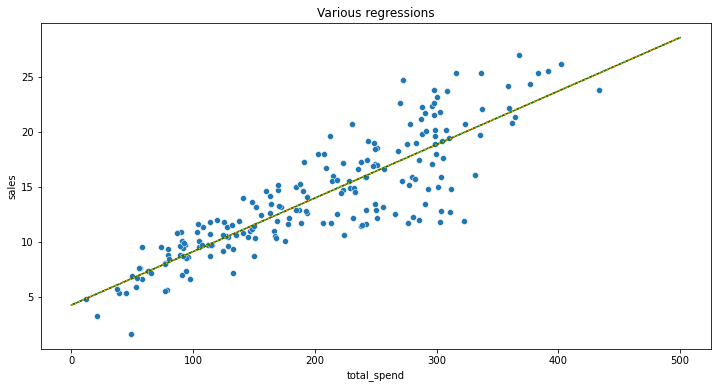

In [12]:
# Graphing the lines 
plt.figure(figsize=(12,6))
potential_spend = np.linspace(0,500,100)

manual = b1*potential_spend + b0
pol_nump = betas[0]*potential_spend + betas[1]
scipy_pol = beta1*potential_spend + beta0

sns.scatterplot(x='total_spend',y='sales',data=df)

plt.plot(potential_spend,manual,color='red', linestyle="dashed")
plt.plot(potential_spend,pol_nump,color='green', linestyle="solid")
plt.plot(potential_spend,scipy_pol,color='orange', linestyle="dotted")
plt.title("Various regressions");

Impossible to see the difference, all tree methods give the same values. As it can be seen, there are many ways to perform a linear regression, these are just some examples, many other libraries enable to do the same or more complex tasks. 